In [ ]:
# ==========================================
# PHASE 1: SETUP & AI MODEL TRAINING
# ==========================================

import pandas as pd
import numpy as np
import requests
import io
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load Primary Dataset (Enron Email Dataset) ---
print(">>> Downloading Primary Dataset (Enron Email Collection)...")

# Using the Enron dataset (approx 5000 real emails)
url_1 = "https://raw.githubusercontent.com/HasanBurney/Spam-Detection/main/spam_ham_dataset.csv"

try:
    content_1 = requests.get(url_1).content
    df = pd.read_csv(io.StringIO(content_1.decode('utf-8')))

    # --- Data Cleaning ---
    df = df[['text', 'label_num']]
    df.columns = ['message', 'label']

    # Convert 0/1 to 'ham'/'spam' for consistency
    df['label'] = df['label'].map({0: 'ham', 1: 'spam'})

    print(f"Data Loaded: {len(df)} emails.")
    print("Sample:\n", df.head(2))

except Exception as e:
    print(f"Error downloading data: {e}")

# --- 2. Train the AI Engine ---
print("\n>>> Training AI Model on EMAILS...")

# Convert text to numbers (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Quick Validation
acc = accuracy_score(y_test, model.predict(X_test))
print(f"✅ Model Successfully Trained!")
print(f"✅ Accuracy on Test Set: {acc * 100:.2f}%")

>>> Downloading Primary Dataset (Enron Email Collection)...
Data Loaded: 5171 emails.
Sample:
                                              message label
0  Subject: enron methanol ; meter # : 988291\nth...   ham
1  Subject: hpl nom for january 9 , 2001\n( see a...   ham

>>> Training AI Model on EMAILS...
✅ Model Successfully Trained!
✅ Accuracy on Test Set: 97.58%


--- DETAILED PERFORMANCE REPORT ---
              precision    recall  f1-score   support

  Ham (Safe)       0.99      0.98      0.98       742
        Spam       0.95      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



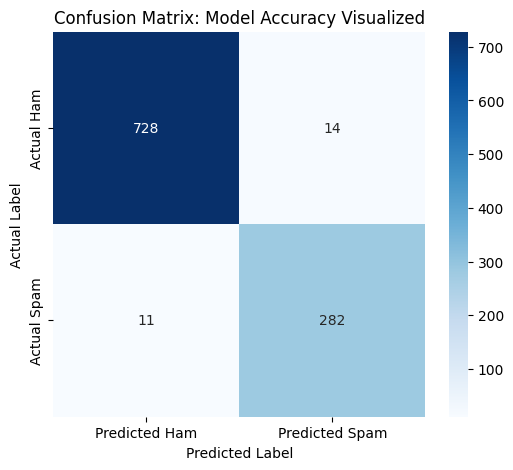

In [ ]:
# ==========================================
# PHASE 2: PERFORMANCE METRICS
# ==========================================

print("--- DETAILED PERFORMANCE REPORT ---")
y_pred = model.predict(X_test)

# 1. Classification Report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred, target_names=['Ham (Safe)', 'Spam']))

# 2. Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix: Model Accuracy Visualized')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

>>> Loading Secondary Dataset...
Secondary Data Loaded: 320 emails.
Sample:
                                        email_text label
0       Here is the project update you asked for.   ham
1  Limited offer!!! Buy now and get 50% discount.  spam

>>> Testing Model on Kaggle Dataset...

✅ Accuracy on Kaggle Dataset: 92.19%

--- PERFORMANCE METRICS ---
              precision    recall  f1-score   support

         Ham       0.86      1.00      0.92       151
        Spam       1.00      0.85      0.92       169

    accuracy                           0.92       320
   macro avg       0.93      0.93      0.92       320
weighted avg       0.93      0.92      0.92       320



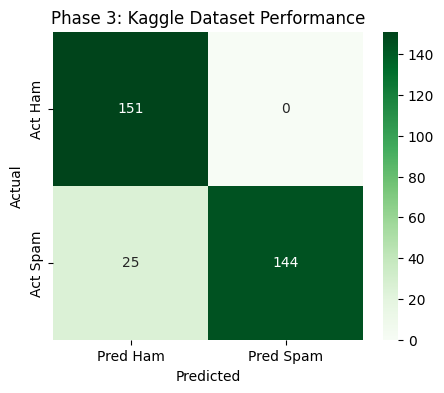

In [ ]:
# ==========================================
# PHASE 3: CROSS-VALIDATION (KAGGLE DATASET)
# ==========================================

print(">>> Loading Secondary Dataset...")

# Loading the Kaggle Dataset (about 320 real mails)
filename = "email_spam_dataset.csv"

try:
    df3 = pd.read_csv(filename)

    # --- Data Standardization ---
    # We rename them to match the model's expected format
    if 'email_text' in df3.columns and 'label' in df3.columns:

        # 1. Clean data
        df3.dropna(subset=['email_text'], inplace=True)

        # 2. Map Labels just to ensure it's lowercase since file already has 'ham'/'spam'
        df3['label'] = df3['label'].str.lower().str.strip()

        print(f"Secondary Data Loaded: {len(df3)} emails.")
        print("Sample:\n", df3[['email_text', 'label']].head(2))

        # --- Test the AI Engine ---
        print("\n>>> Testing Model on Kaggle Dataset...")

        # Vectorize the new emails using the same vectorizer from Phase 1
        X_new = vectorizer.transform(df3['email_text'])

        # Actual labels
        y_new_actual = df3['label']

        # Predict
        y_new_pred = model.predict(X_new)

        # Calculate Accuracy
        new_acc = accuracy_score(y_new_actual, y_new_pred)

        print(f"\n✅ Accuracy on Kaggle Dataset: {new_acc * 100:.2f}%")

        # --- Detailed Report ---
        print("\n--- PERFORMANCE METRICS ---")
        print(classification_report(y_new_actual, y_new_pred, target_names=['Ham', 'Spam']))

        # Confusion Matrix
        plt.figure(figsize=(5, 4))
        cm = confusion_matrix(y_new_actual, y_new_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Pred Ham', 'Pred Spam'],
                    yticklabels=['Act Ham', 'Act Spam'])
        plt.title('Phase 3: Kaggle Dataset Performance')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    else:
        print("Error: Columns 'email_text' and 'label' not found in the CSV.")

except FileNotFoundError:
    print(f"⚠️ Error: Could not find '{filename}'. Please upload it to your Colab files.")
except Exception as e:
    print(f"⚠️ Error: {e}")

In [ ]:
# ==========================================
# PHASE 4: NETWORK PROTOCOL SIMULATION
# ==========================================

class SpamFilterProtocol:
    def __init__(self, ai_model, text_vectorizer):
        self.model = ai_model
        self.vectorizer = text_vectorizer

    def handle_packet(self, source_ip, payload):
        print(f"\n[SERVER] Connection request from {source_ip}")
        print(f"[SERVER] < 220 smtp.ai-firewall.net Service Ready")
        print(f"[CLIENT] > HELO {source_ip}")
        print(f"[SERVER] < 250 Hello {source_ip}")

        # Simulate Data Transmission
        print(f"[CLIENT] > DATA: {payload[:50]}...")
        print(f"[SERVER] ... Inspecting Packet Payload ...")
        time.sleep(0.5) # Network latency simulation

        # AI Inspection
        vec_input = self.vectorizer.transform([payload])
        prediction = self.model.predict(vec_input)[0]

        if prediction == 'spam':
            print(f"[SERVER] < 550 Message Rejected: SPAM Content Detected.")
            return "BLOCKED"
        else:
            print(f"[SERVER] < 250 OK: Queued for delivery.")
            return "ACCEPTED"

# Run Simulation
protocol = SpamFilterProtocol(model, vectorizer)

print("--- SIMULATION: Clean Email ---")
protocol.handle_packet("192.168.1.10", "Hi Team, meeting is rescheduled to 4 PM.")

print("\n--- SIMULATION: Spam Email ---")
protocol.handle_packet("10.5.2.200", "URGENT! You won $1000 cash. Click here to claim FREE prize.")

--- SIMULATION: Clean Email ---

[SERVER] Connection request from 192.168.1.10
[SERVER] < 220 smtp.ai-firewall.net Service Ready
[CLIENT] > HELO 192.168.1.10
[SERVER] < 250 Hello 192.168.1.10
[CLIENT] > DATA: Hi Team, meeting is rescheduled to 4 PM....
[SERVER] ... Inspecting Packet Payload ...
[SERVER] < 250 OK: Queued for delivery.

--- SIMULATION: Spam Email ---

[SERVER] Connection request from 10.5.2.200
[SERVER] < 220 smtp.ai-firewall.net Service Ready
[CLIENT] > HELO 10.5.2.200
[SERVER] < 250 Hello 10.5.2.200
[CLIENT] > DATA: URGENT! You won $1000 cash. Click here to claim FR...
[SERVER] ... Inspecting Packet Payload ...
[SERVER] < 550 Message Rejected: SPAM Content Detected.


'BLOCKED'

In [ ]:
# ==========================================
# PHASE 5: REAL-TIME SCANNER
# ==========================================
import imaplib
import email
from email.header import decode_header
import getpass
import time
import sys

# --- CONFIGURATION ---
CHECK_INTERVAL = 2          # Faster checks (2 seconds)
SPAM_THRESHOLD = 0.85       # AI must be 85% sure to block
WHITELIST_DOMAINS = [
    "gmail.com", "linkedin.com", "github.com", "google.com"
]
SAFE_KEYWORDS = ["interview", "assignment", "syllabus", "meeting", "project", "verify"]

# --- 1. Setup Explainability Engine ---
feature_names = vectorizer.get_feature_names_out()
spam_prob = model.feature_log_prob_[1]
ham_prob = model.feature_log_prob_[0]
word_risk = {word: (spam_prob[i] - ham_prob[i]) for i, word in enumerate(feature_names)}

def get_risk_triggers(text):
    """Finds top 3 words that triggered the alarm"""
    words = text.lower().split()
    triggers = []
    for w in words:
        clean = ''.join(e for e in w if e.isalnum())
        if clean in word_risk and word_risk[clean] > 2.0:
            triggers.append(clean)
    return list(set(triggers))[:3]

def decode_mime(header_val):
    if not header_val: return "Unknown"
    decoded_list = decode_header(header_val)
    text = ""
    for content, encoding in decoded_list:
        if isinstance(content, bytes):
            text += content.decode(encoding if encoding else "utf-8", errors="ignore")
        else:
            text += str(content)
    return text

def advanced_classify(body, subject, sender):
    """Hybrid Classifier: Checks Whitelist -> Keywords -> AI"""
    # 1. WHITELIST
    for domain in WHITELIST_DOMAINS:
        if domain in sender.lower(): return "HAM (Safe)", 0.0, "Whitelisted Domain"
    # 2. KEYWORDS
    for word in SAFE_KEYWORDS:
        if word in subject.lower() or word in body.lower(): return "HAM (Safe)", 0.0, f"Safe Keyword: '{word}'"
    # 3. AI CHECK
    vec_input = vectorizer.transform([body])
    probabilities = model.predict_proba(vec_input)[0]
    spam_score = probabilities[1]

    if spam_score > SPAM_THRESHOLD:
        return "SPAM", spam_score, f"AI Confidence > {SPAM_THRESHOLD*100:.0f}%"
    else:
        return "HAM (Safe)", spam_score, "Low Risk"

def parse_and_scan(mail, email_id, print_output=True):
    try:
        # Fetch RFC822
        res, msg_data = mail.fetch(email_id, "(RFC822)")
        if not msg_data or not isinstance(msg_data[0], tuple): return None

        msg = email.message_from_bytes(msg_data[0][1])

        # Extract Body
        body = ""
        if msg.is_multipart():
            for part in msg.walk():
                if part.get_content_type() == "text/plain":
                    body = part.get_payload(decode=True).decode(errors="ignore")
                    break
        else:
            body = msg.get_payload(decode=True).decode(errors="ignore")

        if not body: return None # Skip empty

        # Metadata
        subject = decode_mime(msg["Subject"])
        sender = decode_mime(msg.get("From"))

        # CLASSIFY
        label, score, reason = advanced_classify(body, subject, sender)

        # Build Output
        output = []
        if label == "SPAM":
            output.append(f"[{email_id.decode()}] 🔴 DETECTED SPAM | Risk: {score*100:.1f}%")
            output.append(f"       From: {sender[:45]}")
            output.append(f"       Sub:  {subject[:45]}...")
            output.append(f"       ⚠️ Reason: {reason}")
            output.append(f"       🔍 Triggers: {get_risk_triggers(body)}")
            output.append("-" * 65)
        else:
            output.append(f"[{email_id.decode()}] 🟢 PASSED CLEAN | Risk: {score*100:.1f}%")
            output.append(f"       From: {sender[:45]}")
            output.append(f"       Sub:  {subject[:45]}...")
            output.append(f"       ✅ Reason: {reason}")
            output.append("-" * 65)

        final_log = "\n".join(output)

        if print_output:
            print(final_log)
            return True
        else:
            return final_log

    except Exception as e:
        return None

# --- MAIN ENGINE ---
def start_engine(user, password):
    print(f"\n>>> Connecting to Gmail ({user})...")
    try:
        mail = imaplib.IMAP4_SSL("imap.gmail.com")
        mail.login(user, password)

        # This catches emails even if Google put them in Spam/Promotions
        rv, data = mail.select('"[Gmail]/All Mail"')
        if rv != 'OK':
            print("⚠️ 'All Mail' folder not found. Falling back to Inbox.")
            mail.select("inbox")
        else:
            print("✅ Monitoring '[Gmail]/All Mail' (Inbox + Spam + Archives)")

        # Get all email IDs
        status, messages = mail.search(None, "ALL")
        all_ids = messages[0].split()

        if not all_ids:
            print("Mailbox is empty.")
            return

        # ==========================================
        # PART 1: SMART HISTORY SCAN (Last 10)
        # ==========================================
        print(f"{'='*65}")
        print(f"   HISTORY ANALYSIS (Last 10 Valid Packets)")
        print(f"{'='*65}")

        valid_logs = []
        idx = len(all_ids) - 1

        while len(valid_logs) < 10 and idx >= 0:
            e_id = all_ids[idx]
            log_entry = parse_and_scan(mail, e_id, print_output=False)
            if log_entry:
                valid_logs.insert(0, log_entry)
            idx -= 1

        for log in valid_logs:
            print(log)

        last_seen_id = int(all_ids[-1])

        # ==========================================
        # PART 2: LIVE MONITOR LOOP
        # ==========================================
        print(f"\n{'='*65}")
        print(f"   🔴 LIVE MONITORING STARTED...")
        print(f"   (Watching ALL folders. Press Stop Button to exit)")
        print(f"{'='*65}")

        while True:
            try:
                # Re-select folder to refresh state
                mail.select('"[Gmail]/All Mail"')
                status, messages = mail.search(None, "ALL")
                current_ids = messages[0].split()

                if current_ids:
                    latest_id = int(current_ids[-1])

                    if latest_id > last_seen_id:
                        print(f"\n>>> 🔔 NEW EMAIL RECEIVED (ID: {latest_id})")

                        # Process new emails
                        for scan_id in range(last_seen_id + 1, latest_id + 1):
                            parse_and_scan(mail, str(scan_id).encode(), print_output=True)

                        last_seen_id = latest_id

                time.sleep(CHECK_INTERVAL)

            except KeyboardInterrupt:
                print("\n\n>>> Disconnecting Engine...")
                break
            except Exception as e:
                # Keep alive on minor errors
                time.sleep(2)
        mail.logout()

    except Exception as e:
        print(f"Login Failed: {e}")

# --- EXECUTION ---
print("Enter Gmail and App Password:")
u = input("Email: ")
p = getpass.getpass("App Password: ")
start_engine(u, p)

Enter Gmail and App Password:

>>> Connecting to Gmail (kanan220706@gmail.com)...
✅ Monitoring '[Gmail]/All Mail' (Inbox + Spam + Archives)
   HISTORY ANALYSIS (Last 10 Valid Packets)
[1573] 🟢 PASSED CLEAN | Risk: 0.0%
       From: Himani Pahel <invitations@linkedin.com>
       Sub:  I’ve sent you a connection request...
       ✅ Reason: Whitelisted Domain
-----------------------------------------------------------------
[1574] 🔴 DETECTED SPAM | Risk: 100.0%
       From: upGrad Study Abroad <info@updates.upgradabroa
       Sub:  Kanan , No GRE/GMAT? No Problem! Study Abroad...
       ⚠️ Reason: AI Confidence > 85%
       🔍 Triggers: ['ffffff', 'htmlimg', 'alt']
-----------------------------------------------------------------
[1575] 🟢 PASSED CLEAN | Risk: 0.0%
       From: LinkedIn <updates-noreply@linkedin.com>
       Sub:  Moulya Baladi, PhD. recently posted...
       ✅ Reason: Whitelisted Domain
-----------------------------------------------------------------
[1576] 🟢 PASSED CLEAN 

In [ ]:
# 1. Install necessary libraries
!pip install -q streamlit pyngrok

# 2. Create the app.py file (Fixed Version)
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import pandas as pd
import numpy as np
import requests
import io
import imaplib
import email
import html  # <--- NEW IMPORT FOR FIXING THE ERROR
from email.header import decode_header
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# --- PAGE CONFIGURATION ---
st.set_page_config(page_title="AI Spam Firewall", page_icon="🛡️", layout="wide")

# --- CSS FOR STYLING ---
st.markdown("""
<style>
    .spam { background-color: #ffcccb; padding: 10px; border-radius: 5px; border-left: 5px solid #ff0000; }
    .ham { background-color: #90ee90; padding: 10px; border-radius: 5px; border-left: 5px solid #008000; }
</style>
""", unsafe_allow_html=True)

# ==========================================
# 1. BACKEND: MODEL TRAINING & LOGIC
# ==========================================
@st.cache_resource
def load_model():
    # Load Dataset
    url = "https://raw.githubusercontent.com/HasanBurney/Spam-Detection/main/spam_ham_dataset.csv"
    content = requests.get(url).content
    df = pd.read_csv(io.StringIO(content.decode("utf-8")))

    # Preprocessing
    df = df[["text", "label_num"]]
    df.columns = ["message", "label"]
    df["label"] = df["label"].map({0: "ham", 1: "spam"})

    # Vectorization & Training
    vectorizer = CountVectorizer(stop_words="english")
    X = vectorizer.fit_transform(df["message"])
    y = df["label"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Calculate Accuracy
    acc = accuracy_score(y_test, model.predict(X_test))

    # Risk Words Calculation
    feature_names = vectorizer.get_feature_names_out()
    spam_prob = model.feature_log_prob_[1]
    ham_prob = model.feature_log_prob_[0]
    word_risk = {word: (spam_prob[i] - ham_prob[i]) for i, word in enumerate(feature_names)}

    return model, vectorizer, word_risk, acc, df

model, vectorizer, word_risk, accuracy, df_train = load_model()

# --- HELPER FUNCTIONS ---
def get_risk_triggers(text):
    words = text.lower().split()
    triggers = []
    for w in words:
        clean = "".join(e for e in w if e.isalnum())
        if clean in word_risk and word_risk[clean] > 2.0:
            triggers.append(clean)
    return list(set(triggers))[:5]

def advanced_classify(body, subject, sender):
    SPAM_THRESHOLD = 0.85
    WHITELIST_DOMAINS = ["gmail.com", "college.edu", "linkedin.com", "github.com"]
    SAFE_KEYWORDS = ["interview", "assignment", "syllabus", "meeting", "project"]

    for domain in WHITELIST_DOMAINS:
        if domain in sender.lower(): return "HAM", 0.0, "✅ Trusted Domain"

    for word in SAFE_KEYWORDS:
        if word in subject.lower() or word in body.lower(): return "HAM", 0.0, f"✅ Safe Keyword: '{word}'"

    vec_input = vectorizer.transform([body])
    prob = model.predict_proba(vec_input)[0]
    spam_score = prob[1]

    if spam_score > SPAM_THRESHOLD:
        return "SPAM", spam_score, f"⚠️ High Confidence (>85%)"
    else:
        return "HAM", spam_score, "🟢 Low Risk Content"

def decode_mime(header_val):
    if not header_val: return "Unknown"
    decoded_list = decode_header(header_val)
    text = ""
    for content, encoding in decoded_list:
        if isinstance(content, bytes):
            text += content.decode(encoding if encoding else "utf-8", errors="ignore")
        else:
            text += str(content)
    return text

# ==========================================
# 2. FRONTEND: UI
# ==========================================
with st.sidebar:
    st.image("https://cdn-icons-png.flaticon.com/512/2092/2092663.png", width=100)
    st.title("Network Firewall")
    st.markdown("---")
    st.write("### 🔐 Live Scanner Credentials")
    email_user = st.text_input("Email Address")
    email_pass = st.text_input("App Password", type="password")
    st.markdown("---")
    st.write(f"**Model Accuracy:** `{accuracy*100:.2f}%`")

tab1, tab2, tab3 = st.tabs(["🏠 Dashboard", "🧪 Manual Test", "📧 Live Scanner"])

with tab1:
    st.title("🛡️ AI Spam Detection Protocol")
    col1, col2 = st.columns(2)
    col1.metric("Total Trained Emails", len(df_train))
    col2.metric("Spam Accuracy", f"{accuracy*100:.1f}%")

    st.subheader("📊 Training Distribution")
    fig, ax = plt.subplots(figsize=(6, 2))
    sns.countplot(y=df_train["label"], palette={"spam":"#ff9999", "ham":"#99ff99"}, ax=ax)
    st.pyplot(fig)

with tab2:
    st.header("🧪 Test the Firewall")
    user_input = st.text_area("Paste Email Content Here", height=150)
    if st.button("Analyze Packet"):
        if user_input:
            label, score, reason = advanced_classify(user_input, "", "unknown")
            triggers = get_risk_triggers(user_input)

            if label == "SPAM":
                st.error(f"🔴 **BLOCKED: SPAM DETECTED**")
            else:
                st.success(f"🟢 **ACCEPTED: SAFE EMAIL**")

            st.write(f"**Risk:** `{score*100:.2f}%` | **Reason:** {reason}")
            if triggers: st.write(f"**Triggers:** {triggers}")
        else:
            st.warning("Please enter text.")

with tab3:
    st.header("📧 Live Gmail Monitor")
    if st.button("🔄 Scan Last 10 Emails"):
        if not email_user or not email_pass:
            st.error("Enter Credentials in Sidebar!")
        else:
            try:
                with st.spinner("Scanning..."):
                    mail = imaplib.IMAP4_SSL("imap.gmail.com")
                    mail.login(email_user, email_pass)
                    rv, data = mail.select('"[Gmail]/All Mail"')
                    if rv != "OK": mail.select("inbox")

                    status, messages = mail.search(None, "ALL")
                    all_ids = messages[0].split()
                    latest = all_ids[-10:]

                    for e_id in reversed(latest):
                        res, msg_data = mail.fetch(e_id, "(RFC822)")
                        if not msg_data or not isinstance(msg_data[0], tuple): continue
                        msg = email.message_from_bytes(msg_data[0][1])

                        body = ""
                        if msg.is_multipart():
                            for part in msg.walk():
                                if part.get_content_type() == "text/plain":
                                    body = part.get_payload(decode=True).decode(errors="ignore")
                                    break
                        else:
                            body = msg.get_payload(decode=True).decode(errors="ignore")

                        subject = decode_mime(msg["Subject"])
                        sender = decode_mime(msg.get("From"))

                        # --- FIX: ESCAPE HTML CHARACTERS ---
                        safe_subject = html.escape(subject)
                        safe_sender = html.escape(sender)
                        # -----------------------------------

                        label, score, reason = advanced_classify(body, subject, sender)
                        triggers = get_risk_triggers(body)

                        color = "spam" if label == "SPAM" else "ham"
                        icon = "🔴" if label == "SPAM" else "🟢"

                        st.markdown(f"""
                        <div class="{color}">
                            <h4>{icon} {label}: {safe_subject}</h4>
                            <p><b>From:</b> {safe_sender}</p>
                            <p><b>Risk:</b> {score*100:.1f}% | <i>{reason}</i></p>
                            <p style="font-size:12px">Triggers: {", ".join(triggers)}</p>
                        </div><br>
                        """, unsafe_allow_html=True)
                    mail.logout()
            except Exception as e:
                st.error(f"Error: {e}")
    ''')

# 3. Authenticate Ngrok & Run App
import os
from pyngrok import ngrok
import time

# --- A. FORCE KILL OLD TUNNELS ---
print(">>> Killing old tunnels...")
ngrok.kill()
os.system("pkill ngrok") # Force kills any system-level ngrok processes
time.sleep(2)        # Wait 2 seconds for cleanup

# --- B. SET TOKEN ---
ngrok.set_auth_token("37Irdz77hp8AsmtS2UCXyejrmFg_7a3jPXknPcjLedTsnSs3Y")

# --- C. START NEW TUNNEL ---
try:
    # Open a tunnel on port 8501
    public_url = ngrok.connect(8501).public_url
    print(f"🚀 Your App is Live here: {public_url}")

    # Run Streamlit in the background
    !streamlit run app.py &>/dev/null&

except Exception as e:
    print(f"Error starting tunnel: {e}")
    print("Try Factory Resetting the Runtime: Runtime > Disconnect and Delete Runtime")

>>> Killing old tunnels...
🚀 Your App is Live here: https://subdermal-unfoolishly-alene.ngrok-free.dev
